# Installations

In [1]:
!pip install -q \
    nltk==3.9.1 \
    contractions==0.1.73 \
    spacy==3.8.11 \
    gensim==4.4.0 \
    fastcoref==2.1.6 \
    matplotlib==3.10.0 \
    numpy==2.0.2 \
    pandas==2.2.2

# Install spaCy English model
!pip install -q "https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl"


# Preprocessing

In [2]:
corpus = [
    "We've got a cleaning task, isn't it?",
    "He's running faster than he ever did!",
    "Don't forget to bring your notebook.",
    "I'm going to the market because it's urgent."
]

In [3]:
import nltk

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [4]:
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [5]:
# Contraction Expansion
def expand_contractions(text):
    return contractions.fix(text)

In [6]:
# Cleaning Function (lowercase + punctuation removal)
def clean_text(text):
    text = expand_contractions(text)
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # remove punctuation
    return text

In [7]:
# Tokenization
def tokenize(text):
    return word_tokenize(text)

In [8]:
# Stopword Removal
stop_words = set(stopwords.words("english"))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

In [9]:
# POS Tagging
def pos_tag_tokens(tokens):
    return pos_tag(tokens)

In [10]:
# WordNet POS Mapper
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'   # adjective
    elif tag.startswith('V'):
        return 'v'   # verb
    elif tag.startswith('N'):
        return 'n'   # noun
    elif tag.startswith('R'):
        return 'r'   # adverb
    return 'n'

In [11]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tagged_tokens):
    lemmatized = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in tagged_tokens
    ]
    return lemmatized

In [12]:
# Full Pipeline Execution
for i, sentence in enumerate(corpus, start=1):
    print(f"\n====== Sentence {i} ======")

    cleaned = clean_text(sentence)
    tokens = tokenize(cleaned)
    tokens_no_sw = remove_stopwords(tokens)
    tagged = pos_tag_tokens(tokens_no_sw)
    lemmatized = lemmatize_tokens(tagged)

    print("Original:", sentence)
    print("Cleaned:", cleaned)
    print("Tokens:", tokens)
    print("Tokens (no stopwords):", tokens_no_sw)
    print("POS Tagged:", tagged)
    print("Lemmatized:", lemmatized)


====== Sentence 1 ======
Original: We've got a cleaning task, isn't it?
Cleaned: we have got a cleaning task is not it
Tokens: ['we', 'have', 'got', 'a', 'cleaning', 'task', 'is', 'not', 'it']
Tokens (no stopwords): ['got', 'cleaning', 'task']
POS Tagged: [('got', 'VBD'), ('cleaning', 'VBG'), ('task', 'NN')]
Lemmatized: ['get', 'clean', 'task']

====== Sentence 2 ======
Original: He's running faster than he ever did!
Cleaned: he is running faster than he ever did
Tokens: ['he', 'is', 'running', 'faster', 'than', 'he', 'ever', 'did']
Tokens (no stopwords): ['running', 'faster', 'ever']
POS Tagged: [('running', 'VBG'), ('faster', 'RBR'), ('ever', 'RB')]
Lemmatized: ['run', 'faster', 'ever']

====== Sentence 3 ======
Original: Don't forget to bring your notebook.
Cleaned: do not forget to bring your notebook
Tokens: ['do', 'not', 'forget', 'to', 'bring', 'your', 'notebook']
Tokens (no stopwords): ['forget', 'bring', 'notebook']
POS Tagged: [('forget', 'VB'), ('bring', 'NN'), ('notebook',

# POS Tagging

Rule Based POS tagging

In [13]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import math

In [14]:
def pos_tag_rule_based(text):
    """
    Rule-based POS tagging using NLTK's built-in tagger.
    Removes stopwords before tagging.
    Returns a list of lists: [ [(word, tag), ...], ... ]
    """
    stop_words = set(stopwords.words("english"))
    sentences = sent_tokenize(text)

    tagged_output = []

    for sent in sentences:
        words = word_tokenize(sent)
        words = [w for w in words if w.lower() not in stop_words]  # remove stopwords
        tagged = nltk.pos_tag(words)
        tagged_output.append(tagged)

    return tagged_output

In [15]:
# Rule-based tagging
text = "The dog sat on the mat and it barked loudly."

pos_tagged = pos_tag_rule_based(text)
print(pos_tagged)

[[('dog', 'NN'), ('sat', 'VBD'), ('mat', 'NN'), ('barked', 'VBD'), ('loudly', 'RB'), ('.', '.')]]


HMM based POS tagging

In [16]:
def train_hmm_pos_tagger(train_data):
    """
    Trains a simple HMM POS tagger using:
    - transition probabilities
    - emission probabilities
    - start probabilities
    Returns a model dictionary.
    """
    transition = defaultdict(lambda: defaultdict(int))
    emission = defaultdict(lambda: defaultdict(int))
    start_prob = defaultdict(int)
    tag_counts = defaultdict(int)

    # Count frequencies
    for sentence in train_data:
        prev_tag = None
        for i, (word, tag) in enumerate(sentence):

            tag_counts[tag] += 1
            emission[tag][word] += 1

            if i == 0:
                start_prob[tag] += 1
            else:
                transition[prev_tag][tag] += 1

            prev_tag = tag

    # Normalize helper
    def normalize(d):
        total = sum(d.values())
        return {k: v / total for k, v in d.items()}

    # Normalize all distributions
    start_prob = normalize(start_prob)
    for tag in emission:
        emission[tag] = normalize(emission[tag])
    for prev in transition:
        transition[prev] = normalize(transition[prev])

    states = list(tag_counts.keys())

    return {
        "states": states,
        "start_prob": start_prob,
        "transition": transition,
        "emission": emission
    }

In [17]:
def viterbi(sentence, states, start_p, trans_p, emit_p):
    """
    The Viterbi algorithm finds the most probable sequence of POS tags for a given sentence
    using dynamic programming. It computes probabilities using start, transition, and
    emission probabilities of the HMM and selects the highest-likelihood tag path.
    The final output is the best possible tag sequence for the input words.
    """
    V = [{}]
    path = {}

    # Initial state
    for state in states:
        V[0][state] = start_p.get(state, 0) * emit_p[state].get(sentence[0], 1e-6)
        path[state] = [state]

    # Recursion
    for t in range(1, len(sentence)):
        V.append({})
        new_path = {}

        for curr_state in states:
            max_prob, prev_state = max(
                (
                    V[t-1][y0]
                    * trans_p[y0].get(curr_state, 1e-6)
                    * emit_p[curr_state].get(sentence[t], 1e-6),
                    y0
                )
                for y0 in states
            )

            V[t][curr_state] = max_prob
            new_path[curr_state] = path[prev_state] + [curr_state]

        path = new_path

    # Termination
    n = len(sentence) - 1
    prob, final_state = max((V[n][y], y) for y in states)

    return path[final_state]

In [18]:
def pos_tag_hmm(tokens, hmm_model):
    """
    Performs HMM-based POS tagging on a tokenized sentence.
    tokens → list of words
    hmm_model → output of train_hmm_pos_tagger()
    """
    states = hmm_model["states"]
    start_prob = hmm_model["start_prob"]
    transition = hmm_model["transition"]
    emission = hmm_model["emission"]

    predicted_tags = viterbi(tokens, states, start_prob, transition, emission)

    return list(zip(tokens, predicted_tags))

In [19]:
# HMM training data
train_data = [
    [("the", "DET"), ("cat", "NOUN"), ("sat", "VERB")],
    [("the", "DET"), ("dog", "NOUN"), ("barked", "VERB")],
    [("a", "DET"), ("dog", "NOUN"), ("sat", "VERB")],
]

# Train HMM
hmm_model = train_hmm_pos_tagger(train_data)

# Test sentence
sentence = ["a", "cat", "barked"]
pos_tagged = pos_tag_hmm(sentence, hmm_model)
print(pos_tagged)

[('a', 'DET'), ('cat', 'NOUN'), ('barked', 'VERB')]


# N-gram

In [20]:
# Download required NLTK data
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
from collections import defaultdict
import nltk
from nltk.corpus import reuters
import re

Bi-gram

In [22]:
from nltk import bigrams

In [23]:
def clean_and_merge(text):
    text = re.sub(r'\bU\.S\.\b', 'US', text)
    text = re.sub(r'\bU\.N\.\b', 'UN', text)
    text = re.sub(r'\bU\.K\.\b', 'UK', text)
    return text

In [24]:
def build_bigram_model():
    """
    This function builds a Bigram model by counting adjacent word pairs
    (w1, w2) from the Reuters corpus and converting the raw counts into
    conditional probabilities. It also merges abbreviations like U.S./U.N.
    and tokenizes each document individually for accuracy.
    """
    model = defaultdict(lambda: defaultdict(lambda: 0))

    for file_id in reuters.fileids():
        text = reuters.raw(file_id)
        text = clean_and_merge(text)
        words = nltk.word_tokenize(text)

        for w1, w2 in bigrams(words):
            model[w1][w2] += 1

    # normalize
    for w1 in model:
        total = float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2] /= total

    return model

In [25]:
def predict_next_word_bigram(w1, model):
    """
    This function predicts the next word given a single previous word using
    the trained Bigram probability distribution. It selects the word with
    the highest conditional probability P(w2 | w1). If no match exists,
    a fallback message is returned.
    """
    next_word_probs = model[w1]

    if next_word_probs:
        return max(next_word_probs, key=next_word_probs.get)
    else:
        return "No prediction available"

In [26]:
bigram_model = build_bigram_model()
print("Bigram Next Word:", predict_next_word_bigram("the", bigram_model))

Bigram Next Word: company


Tri-gram

In [27]:
from nltk import trigrams

In [28]:
def build_trigram_model():
    """
    This function builds a Trigram language model by counting occurrences
    of word triples (w1, w2, w3) across the Reuters corpus. It then converts
    these counts into conditional probabilities P(w3 | w1, w2). This captures
    stronger contextual relationships than bigrams.
    """
    model = defaultdict(lambda: defaultdict(lambda: 0))

    words = nltk.word_tokenize(' '.join(reuters.words()))
    tri_grams = list(trigrams(words))

    # count occurrences
    for w1, w2, w3 in tri_grams:
        model[(w1, w2)][w3] += 1

    # normalize
    for w1_w2 in model:
        total = float(sum(model[w1_w2].values()))
        for w3 in model[w1_w2]:
            model[w1_w2][w3] /= total

    return model

In [29]:
def predict_next_word_trigram(w1, w2, model):
    """
    This function predicts the next word using the previous two words as
    context. It chooses the word with the highest probability from the
    Trigram distribution P(w3 | w1, w2). If the word pair is unseen,
    it returns a fallback message.
    """
    next_word_probs = model[(w1, w2)]

    if next_word_probs:
        return max(next_word_probs, key=next_word_probs.get)
    else:
        return "No prediction available"

In [30]:
trigram_model = build_trigram_model()
print("Trigram Next Word:", predict_next_word_trigram("the", "stock", trigram_model))

Trigram Next Word: of


# Parse Tree

In [31]:
import nltk
from nltk import pos_tag, word_tokenize, RegexpParser
from nltk.tree import Tree
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [32]:
def generate_parse_tree(text):
    """
    This function takes a raw sentence, tokenizes it, performs POS tagging,
    and applies a chunk grammar to generate a parse tree. It identifies key
    linguistic structures such as NP, VP, and PP to create syntactic chunks.
    The final output is an NLTK Tree object.
    """
    # Step 1: Tokenize + POS Tag
    tagged = pos_tag(word_tokenize(text))

    # Step 2: Grammar Rules
    grammar = r"""
        NP: {<DT>?<JJ>*<NN>}    # Noun Phrase
        P: {<IN>}               # Preposition
        V: {<V.*>}              # Verb
        PP: {<P> <NP>}          # Prepositional Phrase
        VP: {<V> <NP|PP>*}      # Verb Phrase
    """

    # Step 3: Parse
    chunker = RegexpParser(grammar)
    tree = chunker.parse(tagged)

    return tree

In [33]:
def draw_tree(tree):
    """Recursively draw NLTK parse tree using matplotlib.
    This function visualizes an NLTK parse tree using matplotlib. It recursively
    draws each node and its children, producing a clean hierarchical syntactic
    tree. It is useful for observing grammatical structure in a non-GUI
    environment like Google Colab.
    """

    print("\n--- Matplotlib Visual Tree Representation ---\n")

    def _draw(tree, x, y, dx):
        label = tree.label() if isinstance(tree, Tree) else str(tree)
        plt.text(x, y, label,
                 ha='center', fontsize=10,
                 bbox=dict(facecolor='white',
                           edgecolor='black',
                           boxstyle='round,pad=0.3'))
        if isinstance(tree, Tree):
            n_children = len(tree)
            if n_children > 0:
                step = dx / n_children
                for i, child in enumerate(tree):
                    new_x = x - dx/2 + step/2 + i*step
                    new_y = y - 1
                    plt.plot([x, new_x], [y - 0.1, new_y + 0.3],
                             color='black', linewidth=0.8)
                    _draw(child, new_x, new_y, step/1.5)

    plt.figure(figsize=(12, 6))
    _draw(tree, 0, 0, 10)
    plt.axis('off')
    plt.show()

In [34]:
def print_tree_views(tree):
    """
    This function prints two readable forms of the parse tree: a structured
    text representation and an ASCII pretty-printed layout. It helps analyze
    syntactic chunks directly in the console without graphics.
    """
    print("\n--- Text Tree Representation ---\n")
    print(tree.pformat())

    print("\n" + "-"*90)
    print("\n--- ASCII Tree (console view) ---\n")
    tree.pretty_print()
    print("\n" + "-"*90)

In [35]:
def parse_pipeline(text):
    """
    A full pipeline that generates the parse tree, prints text and ASCII
    visualizations, and displays the matplotlib version. This combines
    all parsing steps into a single convenient function.
    """
    tree = generate_parse_tree(text)
    print_tree_views(tree)
    draw_tree(tree)
    return tree


--- Text Tree Representation ---

(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  (VP (V jumps/VBZ) (PP (P over/IN) (NP the/DT lazy/JJ dog/NN))))

------------------------------------------------------------------------------------------

--- ASCII Tree (console view) ---

                                    S                                      
           _________________________|_______________                        
          |                |                        VP                     
          |                |         _______________|_____                  
          |                |        |                     PP               
          |                |        |         ____________|_____            
          NP               NP       V        P                  NP         
   _______|________        |        |        |       ___________|______     
The/DT quick/JJ brown/NN fox/NN jumps/VBZ over/IN the/DT     lazy/JJ dog/NN


--------------------------------

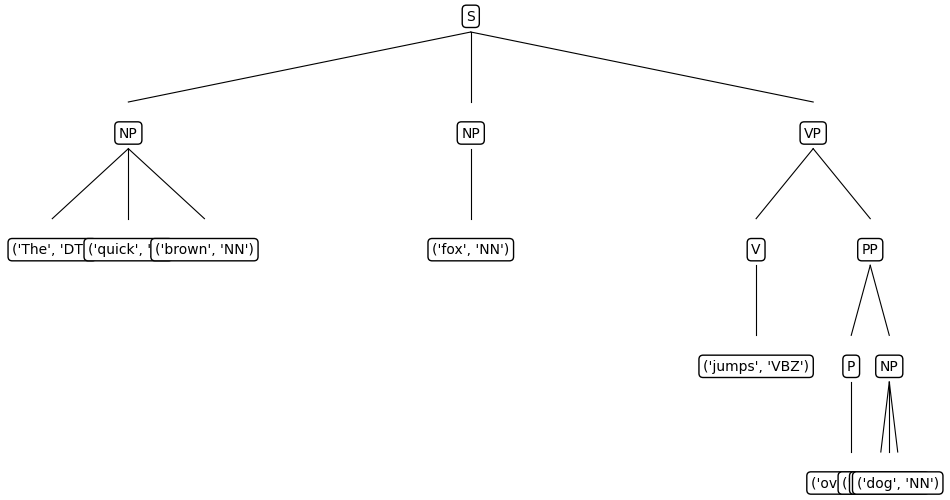

In [36]:
sample = "The quick brown fox jumps over the lazy dog"
tree = parse_pipeline(sample)

# Morphological Parser

In [37]:
sentences = [
    "I am reading a fascinating book.",
    "She walks to school every morning.",
    "They played football yesterday.",
    "The dog is sleeping under the table."
]

In [38]:
# Morphological Parsing Functions
import spacy
from typing import List, Dict

In [39]:
# Load spaCy model safely
def load_spacy_model():
    try:
        return spacy.load("en_core_web_sm")
    except OSError:
        print("Downloading 'en_core_web_sm' model...")
        import os
        os.system("python -m spacy download en_core_web_sm")
        return spacy.load("en_core_web_sm")

In [40]:
def morph_tokenize(nlp, text: str) -> List[str]:
    """
    This function tokenizes English text using spaCy’s built-in tokenizer.
    It returns a clean list of token strings. Useful as the first step of
    morphological and syntactic analysis.
    """
    doc = nlp(text)
    return [token.text for token in doc]

In [41]:
def analyze_token(token) -> Dict[str, str]:
    """
    This function extracts POS tags, lemmas, suffixes, and full morphological
    features for a single token. It mirrors Polyglot-style detailed morphology.
    """
    return {
        "word": token.text,
        "pos": token.pos_,
        "stem": token.lemma_,
        "suffix": token.text[len(token.lemma_):]
                  if token.text.lower().startswith(token.lemma_.lower()) else "",
        "features": str(token.morph) if token.morph else "-"
    }

In [42]:
def parse_morphology(nlp, text: str) -> List[Dict[str, str]]:
    """
    This function processes an entire sentence and returns complete morphological
    information for each token. It applies tokenization, POS tagging, lemmatization,
    and feature extraction in one unified step.
    """
    doc = nlp(text)
    return [analyze_token(token) for token in doc]

In [43]:
def print_morphology_table(analyses: List[Dict[str, str]]):
    """
    Prints morphological results in a clean tabular format.
    Useful for readability during NLP preprocessing, debugging,
    or linguistic analysis.
    """
    print(f"{'Word':<15} {'POS':<8} {'Stem':<15} {'Suffix':<10} {'Features':<50}")
    print("-" * 120)
    for a in analyses:
        print(f"{a['word']:<15} {a['pos']:<8} {a['stem']:<15} {a['suffix']:<10} {a['features']:<50}")

In [44]:
def run_morph_pipeline(text: str):
    """
    A complete morphological pipeline: loads spaCy, runs tokenization,
    POS tagging, lemma extraction, and prints the results. Perfect for
    integration into your broader NLP workflow.
    """
    nlp = load_spacy_model()
    print(f"\nInput Sentence: {text}")
    print("-" * 120)

    analyses = parse_morphology(nlp, text)
    print_morphology_table(analyses)

    return analyses

In [45]:
def run_morph_pipeline(text: str):
    """
    A complete morphological pipeline: loads spaCy, runs tokenization,
    POS tagging, lemma extraction, and prints the results. Perfect for
    integration into your broader NLP workflow.
    """
    nlp = load_spacy_model()
    print(f"\nInput Sentence: {text}")
    print("-" * 120)

    analyses = parse_morphology(nlp, text)
    print_morphology_table(analyses)

    return analyses

In [46]:
nlp = load_spacy_model()

for s in sentences:
    run_morph_pipeline(s)


Input Sentence: I am reading a fascinating book.
------------------------------------------------------------------------------------------------------------------------
Word            POS      Stem            Suffix     Features                                          
------------------------------------------------------------------------------------------------------------------------
I               PRON     I                          Case=Nom|Number=Sing|Person=1|PronType=Prs        
am              AUX      be                         Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin
reading         VERB     read            ing        Aspect=Prog|Tense=Pres|VerbForm=Part              
a               DET      a                          Definite=Ind|PronType=Art                         
fascinating     ADJ      fascinating                Degree=Pos                                        
book            NOUN     book                       Number=Sing                        

# Word Sense Disambiguation

In [47]:
X = "The die is cast."
Y = "Roll the die to get a 6."
Z = "What is dead may never die."

Lesk Algorithm

In [48]:
import nltk
from nltk import wsd
from nltk.corpus import wordnet as wn

# Download required resources
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
def apply_lesk(sentence: str, target_word: str, pos=None):
    """
    Apply the standard Lesk algorithm for Word Sense Disambiguation.
    Returns the best-fitting WordNet synset for the target word.
    """
    tokens = sentence.split()
    return wsd.lesk(tokens, target_word, pos=pos)

In [50]:
# Test sentences

print("---- LESK RESULTS ----")

sense = apply_lesk(X, "die")
print("Sentence:", X)
print("Sense:", sense)
print("Definition:", sense.definition(), "\n")

sense = apply_lesk(Y, "die")
print("Sentence:", Y)
print("Sense:", sense)
print("Definition:", sense.definition(), "\n")

sense = apply_lesk(Z, "die", pos=wn.VERB)
print("Sentence:", Z)
print("Sense:", sense)
print("Definition:", sense.definition())

---- LESK RESULTS ----
Sentence: The die is cast.
Sense: Synset('die.v.07')
Definition: cut or shape with a die 

Sentence: Roll the die to get a 6.
Sense: Synset('die.v.08')
Definition: to be on base at the end of an inning, of a player 

Sentence: What is dead may never die.
Sense: Synset('fail.v.04')
Definition: stop operating or functioning


Adapted Lesk Algorithm

In [51]:
import nltk
from nltk.corpus import wordnet as wn, stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [52]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    return [
        lemmatizer.lemmatize(w.lower())
        for w in nltk.word_tokenize(text)
        if w.isalpha() and w.lower() not in stop_words
    ]

def get_gloss_words(sense):
    words = []
    # Add definition + examples
    words += tokenize_and_lemmatize(sense.definition())
    for ex in sense.examples():
        words += tokenize_and_lemmatize(ex)

    # Add hypernyms & hyponyms info
    for related in sense.hypernyms() + sense.hyponyms():
        words += tokenize_and_lemmatize(related.definition())
        for ex in related.examples():
            words += tokenize_and_lemmatize(ex)

    return set(words)

In [53]:
def apply_adapted_lesk(sentence: str, target_word: str, pos=None):
    """
    Apply the Adapted Lesk algorithm for Word Sense Disambiguation.
    Computes overlap between context and gloss-expanded sense definitions.
    """
    context = set(tokenize_and_lemmatize(sentence))
    best_sense = None
    max_overlap = 0

    for sense in wn.synsets(target_word, pos=pos):
        gloss_words = get_gloss_words(sense)
        overlap = len(context.intersection(gloss_words))

        if overlap > max_overlap:
            max_overlap = overlap
            best_sense = sense

    return best_sense

In [54]:
print("\n---- ADAPTED LESK RESULTS ----")

sense = apply_adapted_lesk(X, "die", pos=wn.NOUN)
print("Sentence:", X)
print("Sense:", sense)
print("Definition:", sense.definition(), "\n")

sense = apply_adapted_lesk(Y, "die", pos=wn.NOUN)
print("Sentence:", Y)
print("Sense:", sense)
print("Definition:", sense.definition(), "\n")

sense = apply_adapted_lesk(Z, "die", pos=wn.VERB)
print("Sentence:", Z)
print("Sense:", sense)
print("Definition:", sense.definition())


---- ADAPTED LESK RESULTS ----
Sentence: The die is cast.
Sense: Synset('die.n.01')
Definition: a small cube with 1 to 6 spots on the six faces; used in gambling to generate random numbers 

Sentence: Roll the die to get a 6.
Sense: Synset('die.n.01')
Definition: a small cube with 1 to 6 spots on the six faces; used in gambling to generate random numbers 

Sentence: What is dead may never die.
Sense: Synset('die.v.01')
Definition: pass from physical life and lose all bodily attributes and functions necessary to sustain life


# Embedding Generation

Word2Vec

In [55]:
text = """
Aarav was an ambitious software engineer working at a bustling tech company in Mumbai.
Every morning, he arrived early to review code and plan the day ahead.
His colleague Meera admired Aarav’s dedication and often collaborated with him on large projects.
"""

In [56]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [57]:
def train_word2vec(text: str, vector_size=100, window=5, min_count=1, sg=1, epochs=100):
    """
    Train a Word2Vec model on input text and return:
      - the trained model
      - a helper function to embed sentences (averaged vectors)
    """

    # Preprocess text into sentences
    sentences = [simple_preprocess(line) for line in text.split('.') if line.strip()]

    # Train Word2Vec
    model = Word2Vec(
        sentences=sentences,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        sg=sg,
        epochs=epochs
    )

    # Sentence embedding function
    def embed_sentence(sentence: str):
        tokens = simple_preprocess(sentence)
        vectors = [model.wv[w] for w in tokens if w in model.wv]
        if not vectors:
            return None
        return sum(vectors) / len(vectors)

    return model, embed_sentence

In [58]:
# Train the model
model, embed_sentence = train_word2vec(text)

# Test word embedding
print("Embedding for 'ambitious':")
print(model.wv['ambitious'])

# Test sentence embedding
sentence = "Aarav was a dedicated engineer."
vec = embed_sentence(sentence)

print("\nSentence Embedding (average vector):")
print("Sentence:", sentence)
print(vec)


Embedding for 'ambitious':
[ 0.00943644 -0.00695104  0.00764546  0.00165948 -0.01069203 -0.00356773
 -0.00011429 -0.00098909 -0.00169642 -0.0085418   0.00708149  0.0077012
  0.00035241  0.00512493 -0.00066785 -0.00182216 -0.00412811  0.0006379
  0.00364001  0.00160092  0.00757655  0.00391411  0.0069581  -0.00894605
 -0.00233989 -0.00465325  0.00422369  0.00944937 -0.00590256  0.00415945
  0.00675479  0.00039677  0.00333761 -0.01155748  0.0086145  -0.00562959
 -0.00668924 -0.00677403 -0.00852852 -0.00480938 -0.00964268 -0.00044238
 -0.00409252 -0.00114171  0.00784671  0.00024731  0.00108129 -0.00334709
  0.01129654  0.00157814  0.00523525  0.00850582 -0.0113562  -0.01092334
  0.00981511  0.00269388 -0.00232535  0.00508068 -0.00404215 -0.00675053
 -0.0096641   0.00501619  0.00071201 -0.00594264 -0.00888567  0.01029134
 -0.00281594 -0.00469016 -0.00543195 -0.00088033 -0.00197714  0.0007957
  0.00572313  0.00197647 -0.00049695  0.00338281  0.00649182 -0.0084315
 -0.00850131  0.00728561 -0.

GloVe

In [59]:
import gensim.downloader as api
import numpy as np

In [60]:
def load_glove_and_utilities(model_name="glove-wiki-gigaword-100"):
    """
    Load a pretrained GloVe model and return:
      - glove_model (gensim KeyedVectors)
      - function: get_word_vector(word)
      - function: most_similar(word, topn)
      - function: similarity(word1, word2)
      - function: sentence_embedding(sentence)
    """
    print("Loading GloVe model... This may take a minute.")
    glove_model = api.load(model_name)
    print("GloVe model loaded successfully!\n")

    # ---- Utility: get word vector ----
    def get_word_vector(word: str):
        return glove_model[word] if word in glove_model else None

    # ---- Utility: get most similar words ----
    def get_most_similar(word: str, topn=5):
        if word not in glove_model:
            return None
        return glove_model.most_similar(word, topn=topn)

    # ---- Utility: compute similarity ----
    def get_similarity(word1: str, word2: str):
        if word1 not in glove_model or word2 not in glove_model:
            return None
        return glove_model.similarity(word1, word2)

    # ---- Utility: sentence embedding ----
    def sentence_embedding(sentence: str):
        tokens = [w.lower() for w in sentence.split() if w.lower() in glove_model]
        if not tokens:
            return np.zeros(glove_model.vector_size)
        vectors = np.array([glove_model[w] for w in tokens])
        return np.mean(vectors, axis=0)

    return glove_model, get_word_vector, get_most_similar, get_similarity, sentence_embedding

In [61]:
# Load GloVe and utilities
glove_model, word_vec, most_sim, sim, sent_embed = load_glove_and_utilities()

# --- Word Embedding ---
print("Vector for 'science':")
print(word_vec("science"))

# --- Most Similar Words ---
print("\nMost similar to 'science':")
print(most_sim("science", topn=5))

# --- Word Similarity ---
print("\nSimilarity Examples:")
print("king vs queen:", sim("king", "queen"))
print("car vs bus:", sim("car", "bus"))
print("dog vs banana:", sim("dog", "banana"))

# --- Sentence Embedding ---
sentence = "Artificial intelligence is transforming the world."
embedding = sent_embed(sentence)

print("\nSentence:", sentence)
print("Embedding shape:", embedding.shape)
print("First 10 dims:", embedding[:10])

Loading GloVe model... This may take a minute.
GloVe model loaded successfully!

Vector for 'science':
[-0.13322   0.48858   0.18867   0.33791   0.54542  -0.69881   0.59954
 -0.40264  -0.26124   0.69962  -0.15999  -0.91523  -0.15415   0.60943
 -0.28774  -0.19603   0.69995   0.80869  -0.50221   0.46715  -0.53153
 -0.15619   0.30569  -0.67774   0.28715  -0.008962  0.65407  -0.47046
 -0.46508   0.2013   -1.3639    0.5951   -0.92377   0.24296  -0.81308
  0.058247 -0.94609   0.41951  -0.79614  -0.012944 -1.0193   -0.084872
 -1.537    -0.46909  -0.13942  -0.25741   0.17223   0.64303  -0.29022
  0.12509   0.53726  -0.42284   0.26365   0.46066  -0.075186 -1.8833
  0.73096   0.3121    1.4856    0.21834  -0.038657  0.89277  -0.30721
 -0.27414   0.74099   0.28438   0.034259  0.7253    0.79931   0.86114
  0.24113   0.68165   0.36753   0.15836  -1.2239    0.24132   0.42126
  0.050802 -1.0145   -0.21926  -0.38704   0.92132  -0.52473  -0.4821
 -1.4684    0.70665   0.033025 -0.46778   0.4284   -0.5834

# Anaphora Resolution

In [62]:
from fastcoref import FCoref

In [63]:
def coreference_resolution(text, device="cpu"):
    """
    Perform coreference resolution using FastCoref.
    Returns:
        - original text
        - resolved text with pronouns replaced by their referents
        - result object (raw FastCoref output)
    """

    model = FCoref(device=device)
    result = model.predict([text])[0]

    # --- Extract offsets for replacements ---
    clusters = result.get_clusters()
    char_map = result.char_map
    resolved = text
    replacements = []

    # For each coreference cluster
    for cluster in clusters:
        representative = cluster[0]  # main entity (e.g., "Alice")

        # Replace remaining mentions in the cluster with representative
        for mention in cluster[1:]:
            # find character span of this mention
            for key, span in char_map.items():
                start, end = span[1]
                if text[start:end] == mention:
                    replacements.append((start, end, representative))
                    break

    # Apply replacements from back to front (avoid shifting indices)
    replacements.sort(reverse=True)
    for start, end, representative in replacements:
        resolved = resolved[:start] + representative + resolved[end:]

    return text, resolved, result

In [64]:
# --- Test the coreference resolver ---
sample = "Alice went to the park. She sat on a bench and read a book."

original, resolved, raw = coreference_resolution(sample)

print("\nOriginal Text:\n", original)
print("\nResolved Text:\n", resolved)

print("\nAvailable Attributes on Result Object:")
attrs = [a for a in dir(raw) if not a.startswith("_")]
print(attrs)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/1 [00:00<?, ? examples/s]

Inference:   0%|          | 0/1 [00:00<?, ?it/s]


Original Text:
 Alice went to the park. She sat on a bench and read a book.

Resolved Text:
 Alice went to the park. Alice sat on a bench and read a book.

Available Attributes on Result Object:
['char_map', 'clusters', 'coref_logit', 'get_clusters', 'get_logit', 'reverse_char_map', 'text', 'text_idx']


# Named Entity Recognition

In [65]:
import spacy

# Load SpaCy NER model
nlp = spacy.load("en_core_web_sm")

In [66]:
def perform_ner(text):
    """
    Perform Named Entity Recognition (NER) on the given text.

    Args:
        text (str): Input text.

    Returns:
        List of tuples: [(entity_text, entity_label), ...]
    """
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [67]:
# ---------------- Example ---------------- #
sample_text = "Barack Obama was born in Hawaii and became the President of the United States."

ner_output = perform_ner(sample_text)
print("NER Output:", ner_output)

NER Output: [('Barack Obama', 'PERSON'), ('Hawaii', 'GPE'), ('the United States', 'GPE')]


# TF-IDF

In [68]:
import math
from collections import defaultdict

In [69]:
def compute_tfidf(documents):
    """
    Compute TF-IDF for a list of documents using:
    tf = log10(count + 1)
    idf = log10(N / df)

    Args:
        documents: list of strings

    Returns:
        dict: {doc_index: {word: tfidf_score}}
    """
    # Tokenize
    tokenized_docs = [doc.lower().split() for doc in documents]
    N = len(tokenized_docs)

    # Document frequency (df)
    df = defaultdict(int)
    for doc in tokenized_docs:
        for word in set(doc):
            df[word] += 1

    # TF-IDF scores
    tfidf = {}
    for i, doc in enumerate(tokenized_docs):
        word_counts = defaultdict(int)
        for word in doc:
            word_counts[word] += 1

        tfidf[i] = {}
        for word, count in word_counts.items():
            tf = math.log10(count + 1)
            idf = math.log10(N / df[word])
            tfidf[i][word] = tf * idf

    return tfidf

In [70]:
# Example
docs = [
    "I love natural language processing",
    "Language models love data",
]

print(compute_tfidf(docs))

{0: {'i': 0.09061905828945654, 'love': 0.0, 'natural': 0.09061905828945654, 'language': 0.0, 'processing': 0.09061905828945654}, 1: {'language': 0.0, 'models': 0.09061905828945654, 'love': 0.0, 'data': 0.09061905828945654}}


# Chunking (NP Chunk Extraction)


In [71]:
# Uses POS tagging + a simple chunk grammar.

import nltk
from nltk import pos_tag, word_tokenize, RegexpParser

In [72]:
def extract_chunks(text):
    """
    Extract Noun Phrase (NP) chunks from text.

    Returns:
        list of NP chunks
    """
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    grammar = "NP: {<DT>?<JJ>*<NN.*>+}"
    parser = RegexpParser(grammar)

    tree = parser.parse(pos_tags)

    chunks = []
    for subtree in tree.subtrees():
        if subtree.label() == "NP":
            chunk = " ".join(word for word, pos in subtree.leaves())
            chunks.append(chunk)

    return chunks

In [73]:
# Example
print(extract_chunks("The quick brown fox jumped over the lazy dog."))

['The quick brown fox', 'the lazy dog']


# Sentence Similarity (Cosine Similarity + TF-IDF)

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
def sentence_similarity(sent1, sent2):
    """
    Compute cosine similarity between two sentences using TF-IDF.

    Returns:
        similarity score (0 to 1)
    """
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([sent1, sent2])

    sim = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]
    return sim

In [79]:
# Example
s1 = "I love machine learning"
s2 = "Machine learning is my passion"

print("Sentence 1:", s1)
print("Sentence 2:", s2)
print("Sentence Similarity:", sentence_similarity(s1, s2))

Sentence 1: I love machine learning
Sentence 2: Machine learning is my passion
Sentence Similarity: 0.35630042933313816
